In [110]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,matthews_corrcoef,classification_report
import numpy as np

In [111]:
data = pd.read_csv("heart.csv")
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [113]:
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [114]:
X = data.drop(['target'],axis=1)
y = data['target']

In [115]:
scaler = StandardScaler()

X_scaled = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X_scaled.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-0.268437,0.661504,-0.915755,-0.377636,-0.659332,-0.418878,0.891255,0.821321,-0.712287,-0.060888,0.995433,1.209221,1.089852
1,-0.158157,0.661504,-0.915755,0.479107,-0.833861,2.387330,-1.004049,0.255968,1.403928,1.727137,-2.243675,-0.731971,1.089852
2,1.716595,0.661504,-0.915755,0.764688,-1.396233,-0.418878,0.891255,-1.048692,1.403928,1.301417,-2.243675,-0.731971,1.089852
3,0.724079,0.661504,-0.915755,0.936037,-0.833861,-0.418878,0.891255,0.516900,-0.712287,-0.912329,0.995433,0.238625,1.089852
4,0.834359,-1.511706,-0.915755,0.364875,0.930822,2.387330,0.891255,-1.874977,-0.712287,0.705408,-0.624121,2.179817,-0.522122


In [116]:
X_train,X_val,y_train,y_val = train_test_split(X_scaled,y,test_size=0.2)

In [117]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X_scaled,y)
predictions = model.predict(X_val)

print(f"The accuracy score:{accuracy_score(predictions,y_val)}")
print(f"The precision score:{precision_score(predictions,y_val)}")
print(f"The recall score:{recall_score(predictions,y_val)}")
print(f"The f1 score:{f1_score(predictions,y_val)}")
print(f"The auc score:{roc_auc_score(predictions,y_val)}")
print(f"The mcc score:{matthews_corrcoef(predictions,y_val)}")

The accuracy score:1.0
The precision score:1.0
The recall score:1.0
The f1 score:1.0
The auc score:1.0
The mcc score:1.0


In [118]:
param_dist = {
    'n_estimators':[1,10,20,30,40,50,60,70,80,90,100]
}
random_search = RandomizedSearchCV(model,param_distributions=param_dist)
random_search.fit(X_train,y_train)
print("Best Parameters: ",random_search.best_params_)

Best Parameters:  {'n_estimators': 60}


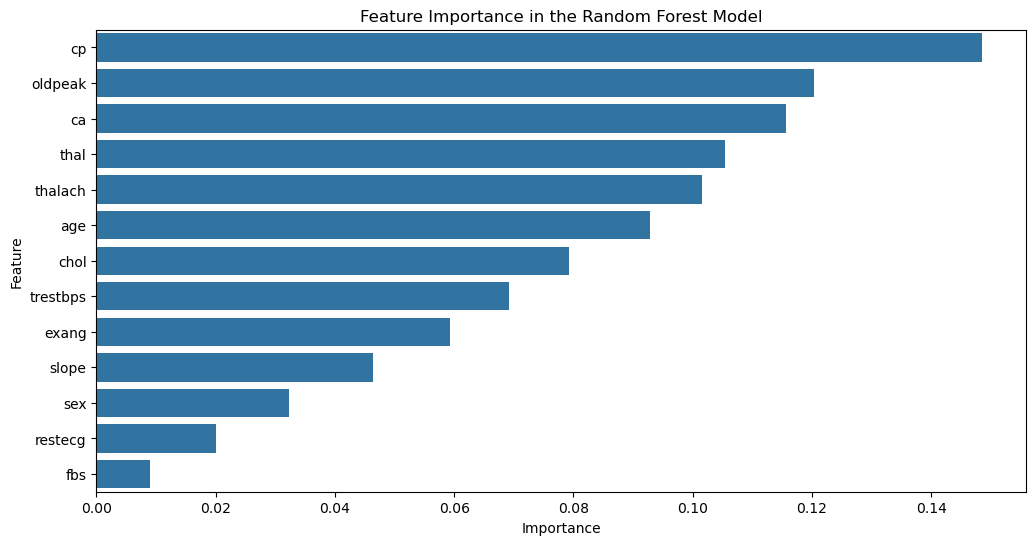

In [119]:
feature_importances = model.feature_importances_
features = X.columns

importance_df = pd.DataFrame({'Feature':features,'Importance':feature_importances})
importance_df = importance_df.sort_values(by='Importance',ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x='Importance',y = 'Feature',data = importance_df)
plt.title('Feature Importance in the Random Forest Model')
plt.show()

In [120]:
model2 = RandomForestClassifier(n_estimators=100, oob_score=True)
model2.fit(X_scaled,y)
print(model2.oob_score_)

1.0


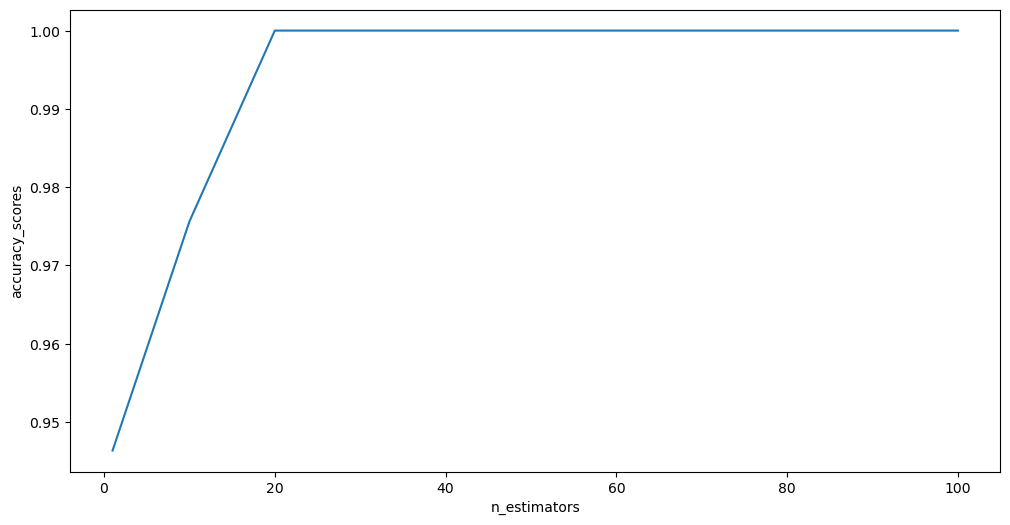

In [121]:
def performance_comparison(n_estimators_array):
    accuracy_scores = []
    for i in n_estimators_array:
        model = RandomForestClassifier(n_estimators=i)
        model.fit(X_train,y_train)

        predict = model.predict(X_val)
        accuracy_scores.append(accuracy_score(predict,y_val))
    
    plt.figure(figsize=(12,6))
    sns.lineplot(x=n_estimators_array,y=accuracy_scores)
    plt.xlabel("n_estimators")
    plt.ylabel("accuracy_scores")
    plt.show()

performance_comparison([1,10,20,50,90,100])



In [122]:
model3 = svm.SVC(kernel='rbf')
model3.fit(X_train,y_train)
predictions = model3.predict(X_val)

print(f"The accuracy score:{accuracy_score(predictions,y_val)}")
print(f"The precision score:{precision_score(predictions,y_val)}")
print(f"The recall score:{recall_score(predictions,y_val)}")
print(f"The f1 score:{f1_score(predictions,y_val)}")
print(f"The auc score:{roc_auc_score(predictions,y_val)}")
print(f"The mcc score:{matthews_corrcoef(predictions,y_val)}")
report = classification_report(y_val,predictions,target_names=['No Disease','Disease'])
print(report)

The accuracy score:0.9219512195121952
The precision score:0.9166666666666666
The recall score:0.9339622641509434
The f1 score:0.9252336448598131
The auc score:0.9215265866209263
The mcc score:0.8437771348808378
              precision    recall  f1-score   support

  No Disease       0.91      0.93      0.92        97
     Disease       0.93      0.92      0.93       108

    accuracy                           0.92       205
   macro avg       0.92      0.92      0.92       205
weighted avg       0.92      0.92      0.92       205



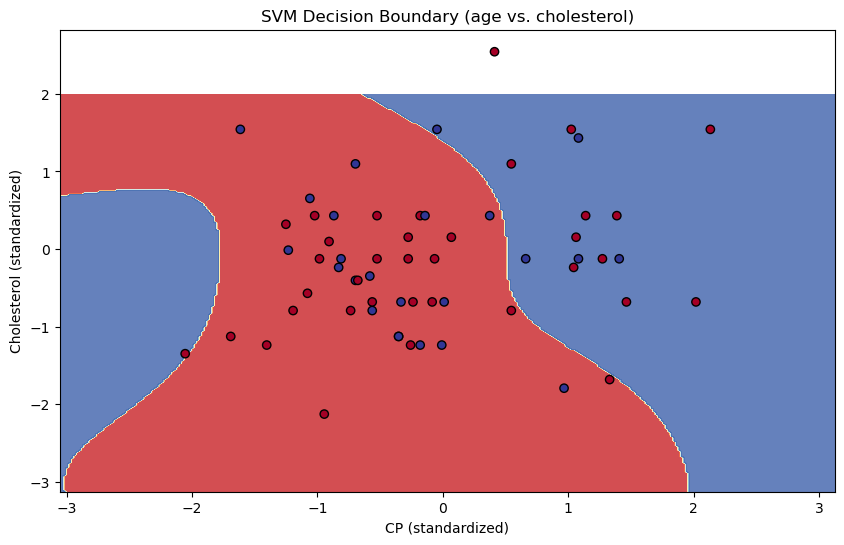

In [123]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
columns = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]
data = pd.read_csv(url, header=None, names=columns, na_values="?")

# Data preprocessing
data = data.dropna()
X = data[["chol", "trestbps"]]
y = data["target"]
y = y.apply(lambda x: 1 if x > 0 else 0)  # Convert to binary classification

# Split the dataset into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Train the SVM classifier with RBF kernel
model4 = SVC(kernel='rbf', probability=True, random_state=42)
model4.fit(X_train_scaled, y_train)

# Create a mesh grid
h = .02  # Step size in the mesh
x_min, x_max = X_val_scaled[:, 0].min() - 1, X_val_scaled[:, 0].max() + 1
y_min, y_max = X_val_scaled[:, 1].min() - 1, y_val.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict on the mesh grid
Z = model4.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
plt.scatter(X_val_scaled[:, 0], X_val_scaled[:, 1], c=y_val, edgecolors='k', cmap=plt.cm.RdYlBu)
plt.xlabel('CP (standardized)')
plt.ylabel('Cholesterol (standardized)')
plt.title('SVM Decision Boundary (age vs. cholesterol)')
plt.show()
